In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%run util.py
pwd = os.getcwd()

In [2]:
key_soft = {1:'mpich-3.3-gcc-6.4.0',
            2:'openmpi-1.10.5-gcc-6.4.0',
            3:'openmpi-1.10.5-intel2013.2',
            4:'openmpi-3.1.3-gcc-6.4.0',
            5:'mvapich2-gcc-4.8.3'}

col_dict = {1:'c',2:'m',3:'y',4:'g',5:'k'}

osu_ver = 'v5.6.2'
trials  = 20

In [3]:
bw_mean = np.zeros((23,5))
bw_std  = np.zeros((23,5))
lt_mean = np.zeros((23,5))
lt_std  = np.zeros((23,5))

In [4]:
for i in np.arange(1,len(key_soft)+1):
    prefix = '/mnt/c/Users/sajid/Documents/misc/nu-quest-mpi/curr_mpi_bench/osu-micro-benchmarks-5.6.2/build.'
    loc = prefix+key_soft[i]+'/mpi/one-sided'
    BW = get_BW_dset(loc,osu_ver,trials)
    bw_mean[:,i-1] = np.mean(BW,axis=1)
    bw_std[:,i-1]  = np.std(BW,axis=1)
    
    LT = get_LT_dset(loc,osu_ver,trials)
    lt_mean[:,i-1] = np.mean(LT,axis=1)
    lt_std[:,i-1]  = np.std(LT,axis=1)
    
os.chdir(pwd)

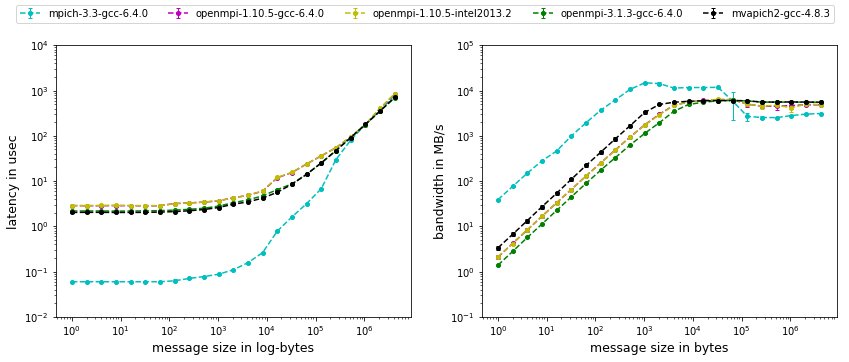

In [5]:
plt.rcParams["figure.figsize"] = (14,5)
f,(ax1,ax2) = plt.subplots(1,2)

for i in range(1,len(key_soft)+1):
    _x = bw_key
    ax1.errorbar(_x, lt_mean[:,i-1],lt_std[:,i-1],
                 c=col_dict[i], 
                 fmt='--o',markersize=4,elinewidth=1,capsize=2)
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_ylim((10**-2,10**4))
    ax1.set_xlabel('message size in log-bytes',size=12.5);
    ax1.set_ylabel('latency in usec',size=12.5);

    _x = lt_key
    ax2.errorbar(_x, bw_mean[:,i-1],bw_std[:,i-1],
                 c=col_dict[i], label=key_soft[i],
                 fmt='--o',markersize=4,elinewidth=1,capsize=2)
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    ax2.set_ylim((10**-1,10**5))
    ax2.set_xlabel('message size in bytes',size=12.5);
    ax2.set_ylabel('bandwidth in MB/s',size=12.5);

    
handles, labels = ax2.get_legend_handles_labels()  
f.legend(loc='upper center', fontsize='medium', ncol=5)
plt.savefig("curr_mpi.png",dpi=100)

In [6]:
!mv curr_mpi.png plots/